In [1]:
import ipynb.fs.defs.Model as model
import matplotlib.pyplot as plt
import visuals as v
%matplotlib inline

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams.update({'font.size': 12})

Loading data


100%|███████████████████████████████████████████████████| 118/118 [00:08<00:00, 10.77it/s]


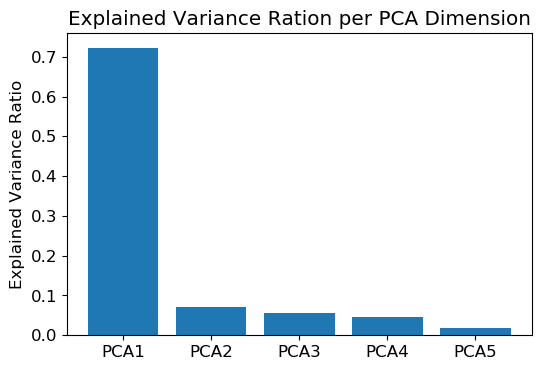

In [3]:
from sklearn.decomposition import PCA

X, y = model.get_match_data(week=6, with_rs=True)

pca = PCA(n_components=5, random_state=42)
pca.fit(X)
variance_ratios = pca.explained_variance_ratio_
plt.figure(1, figsize=(6,4))
plt.bar([i for i in range(len(variance_ratios))], variance_ratios)
plt.xticks([i for i in range(len(variance_ratios))], ['PCA'+str(i+1) for i in range(len(variance_ratios))])
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ration per PCA Dimension')
plt.show()

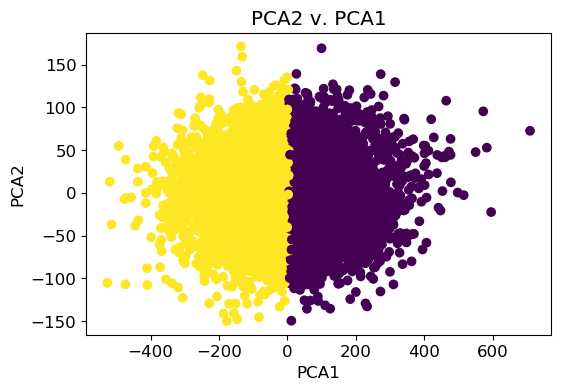

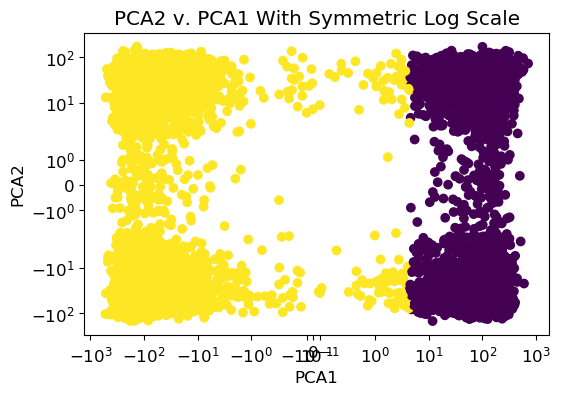

In [4]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
X_transform = pca.transform(X)
clusterer = GaussianMixture(n_components=2, random_state=42).fit(X_transform[:,:1])
preds = clusterer.predict(X_transform[:,:1])
plt.figure(1, figsize=(6,4))
plt.scatter(X_transform[:,0], X_transform[:,1], c=preds)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA2 v. PCA1')
plt.figure(2, figsize=(6,4))
plt.scatter(X_transform[:,0], X_transform[:,1], c=preds)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xscale('symlog', linthreshx=.9)
plt.yscale('symlog', linthreshx=.9)
plt.title('PCA2 v. PCA1 With Symmetric Log Scale')
plt.show()

In [5]:
score = silhouette_score(X_transform[:,:1], preds)
score

0.546808019711086

Training set has 7815 samples and 5 features.
Testing set has 1380 samples and 5 features.


c:\programdata\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\programdata\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


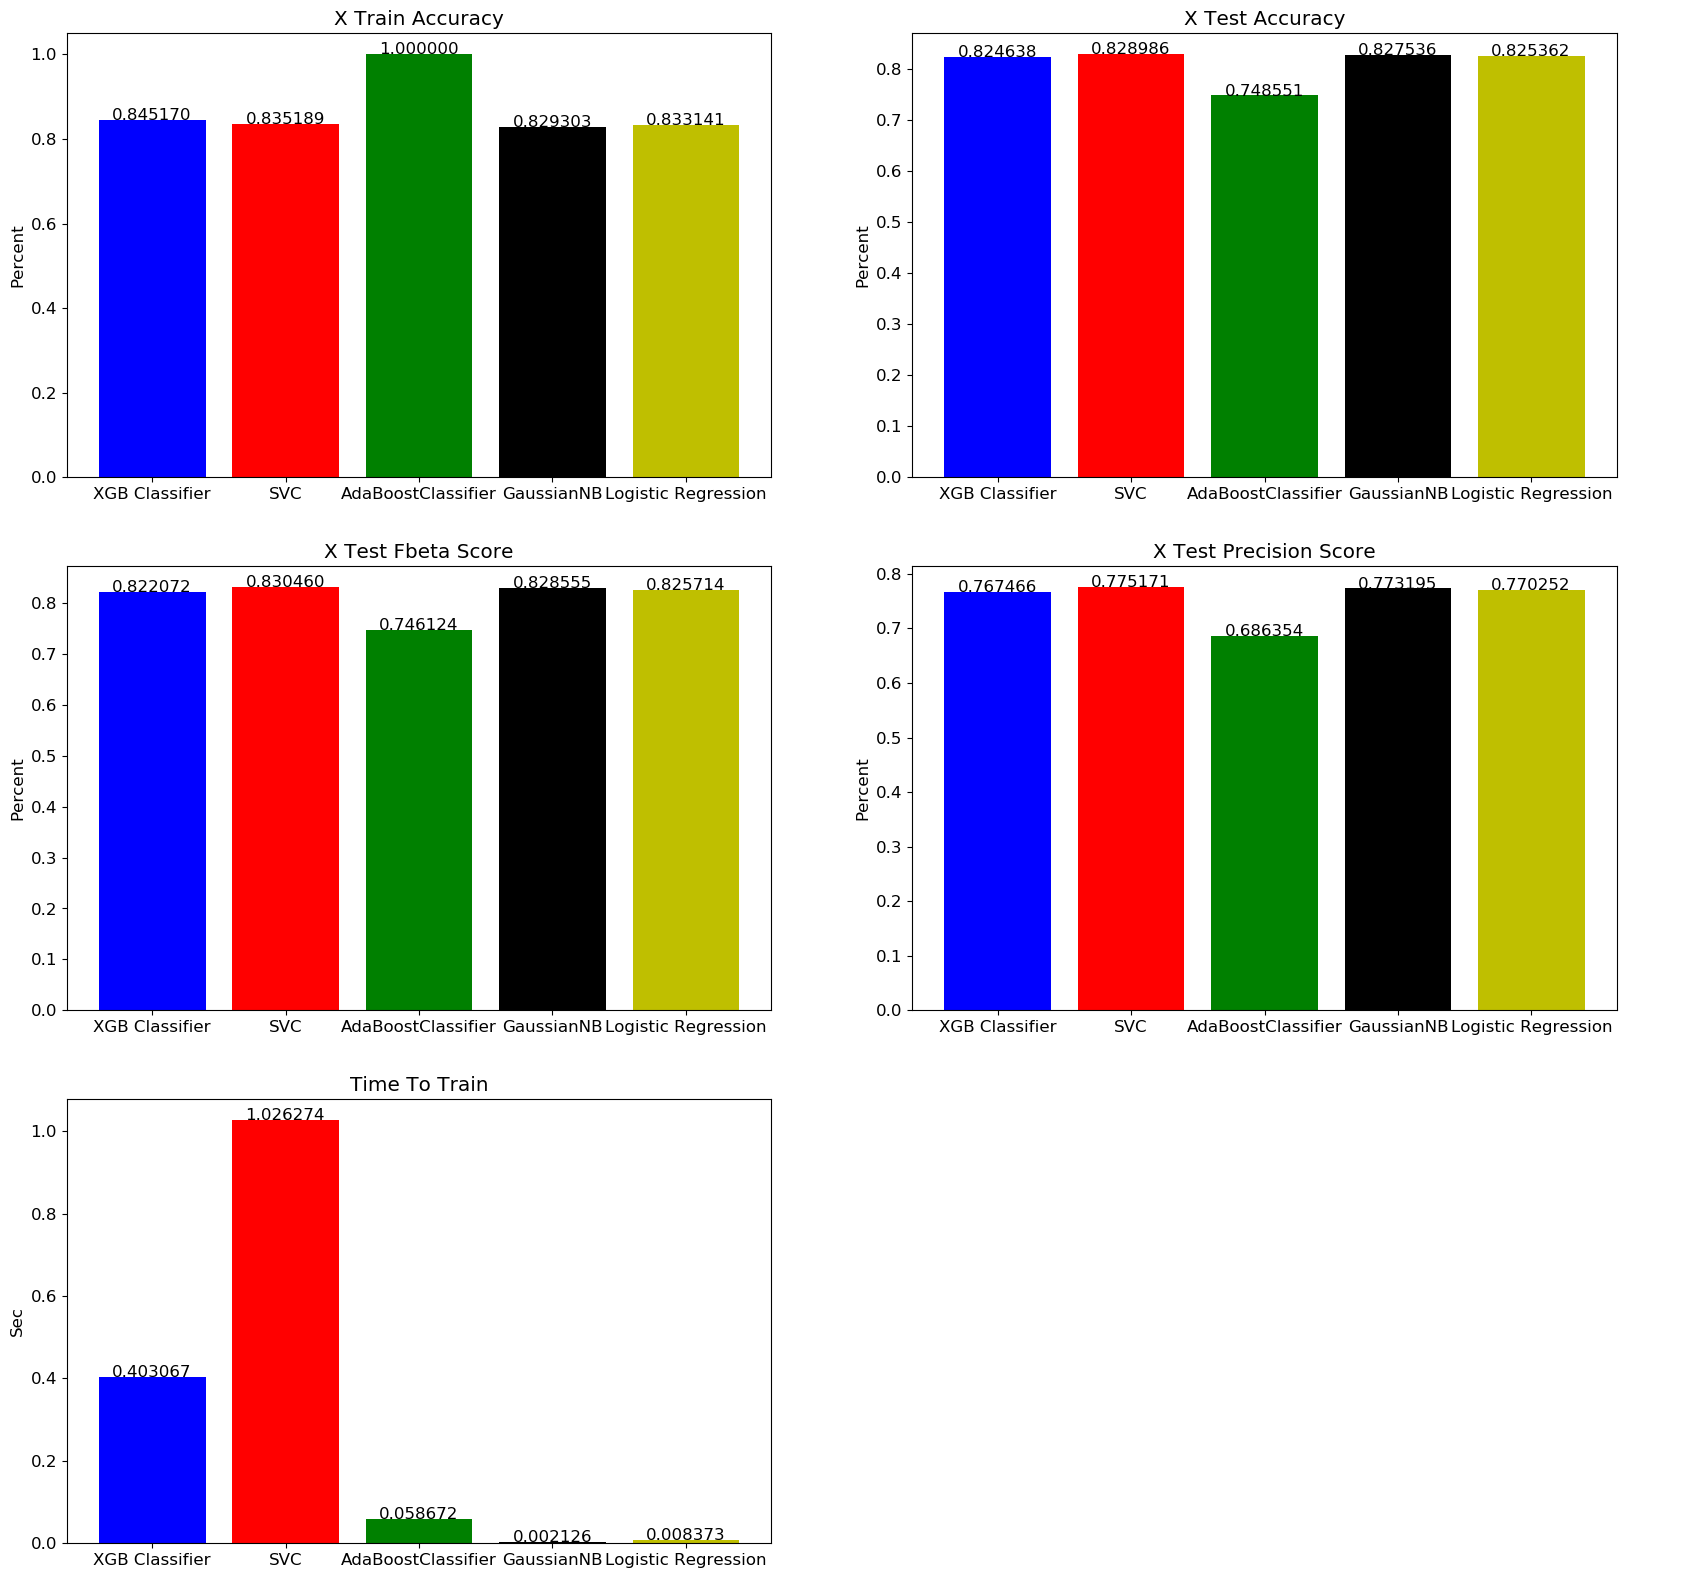

In [6]:
data = model.model_selection(X_transform, y)
v.model_selection_scores(data, mpl, plt)

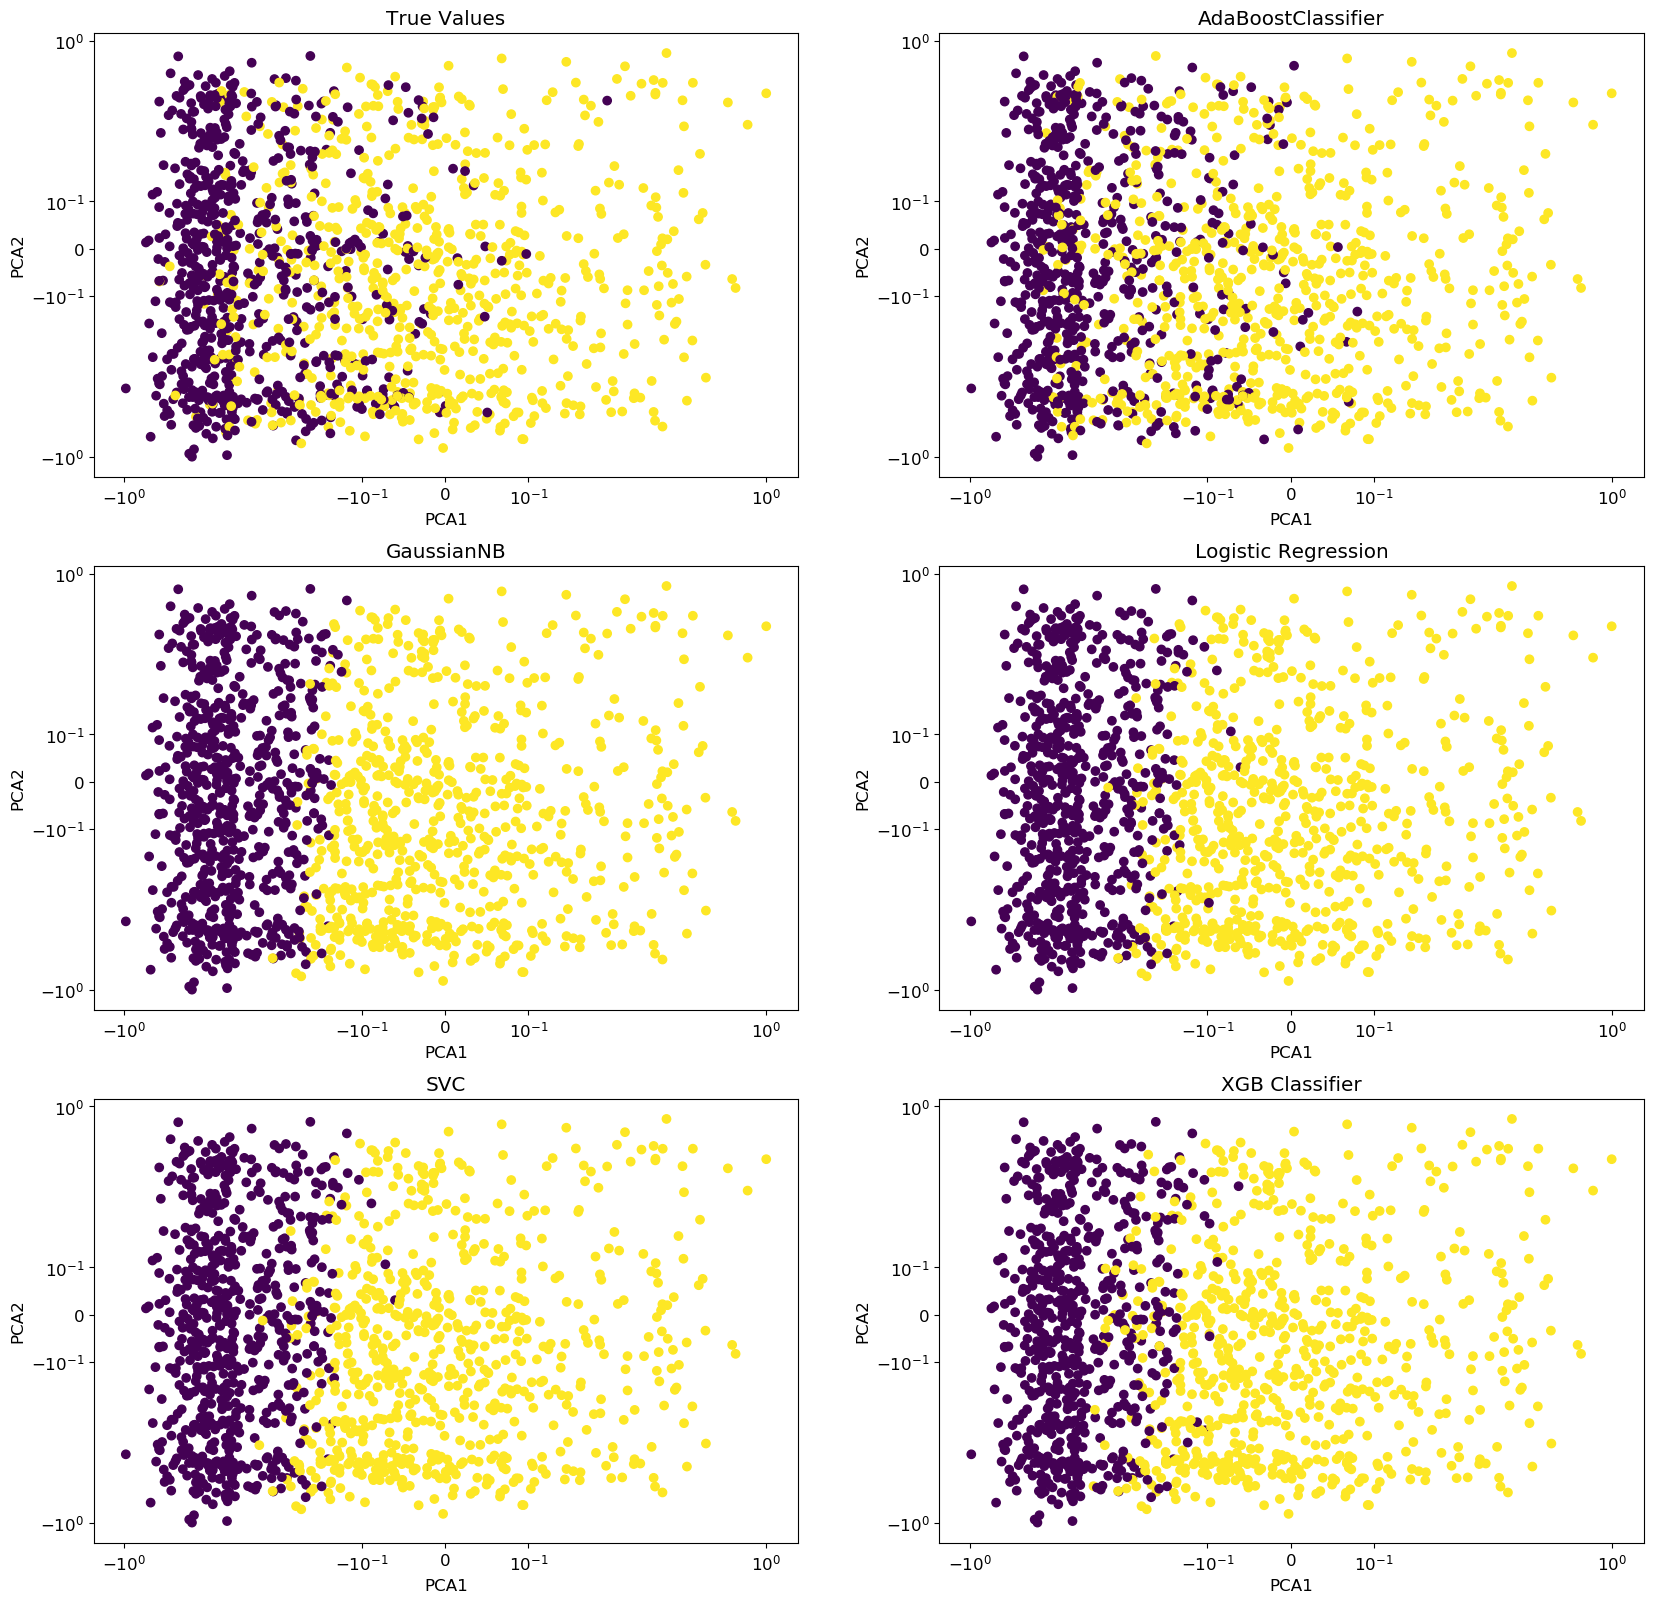

In [7]:
v.model_selection_pca_plots(data, mpl, plt)

Loading match data to train on


100%|███████████████████████████████████████████████████| 106/106 [00:07<00:00, 13.36it/s]


Training set has 8227 samples and 5 features.

Loading future data to predict on


100%|█████████████████████████████████████████████████████| 12/12 [00:03<00:00,  3.45it/s]


0.8119834710743802
0.8140479090539993
0.7572692127174186

0.71900826446281
0.7096114519427403
0.6465232649754646


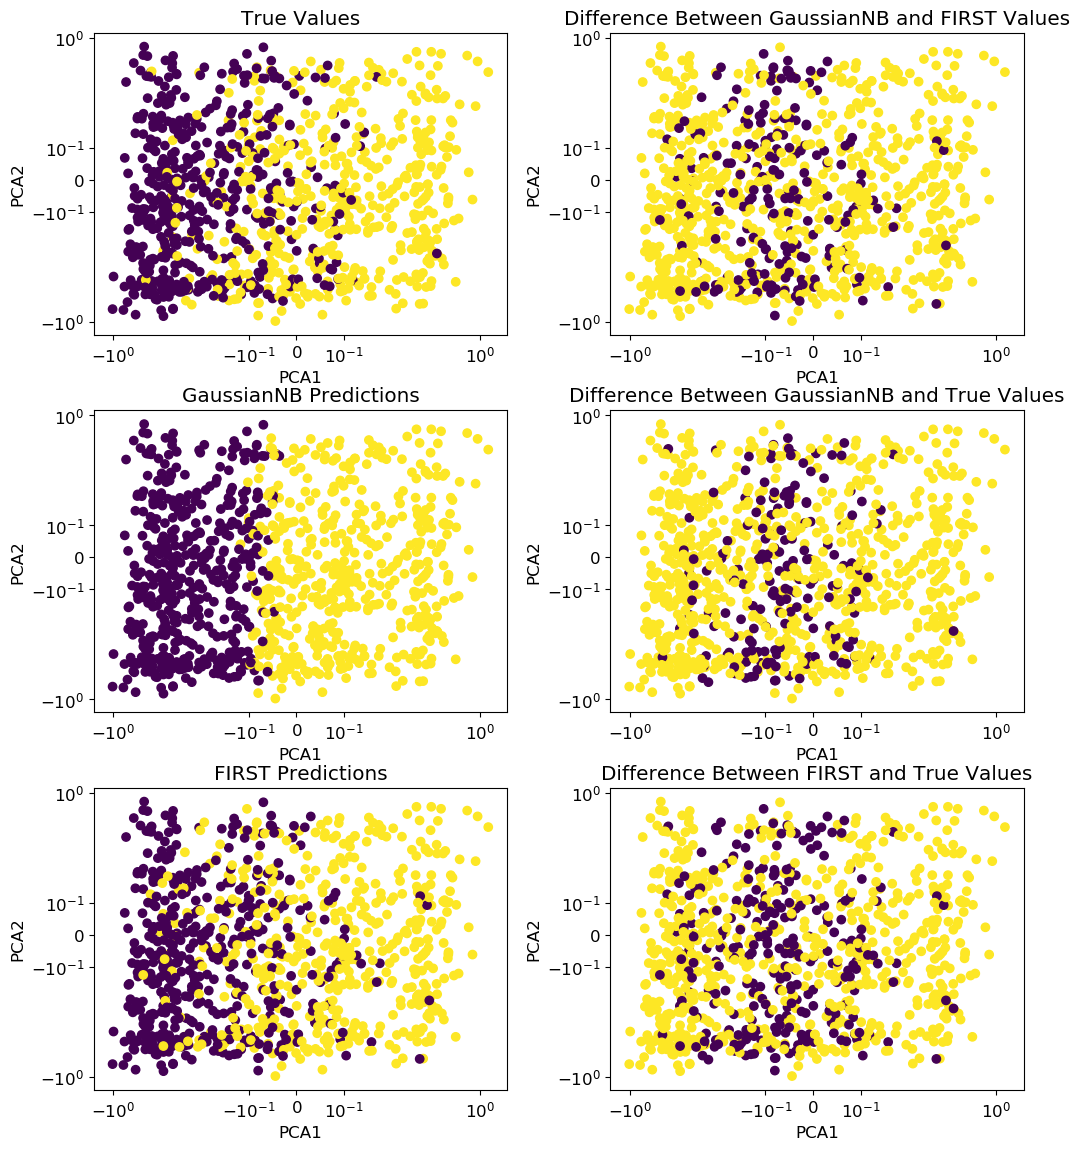

In [8]:
data = model.future_matches_GNB(6, num_pca=5)
v.GNB_predictions(data, mpl, plt)

Training set has 7815 samples and 748 features.
Testing set has 1380 samples and 748 features.


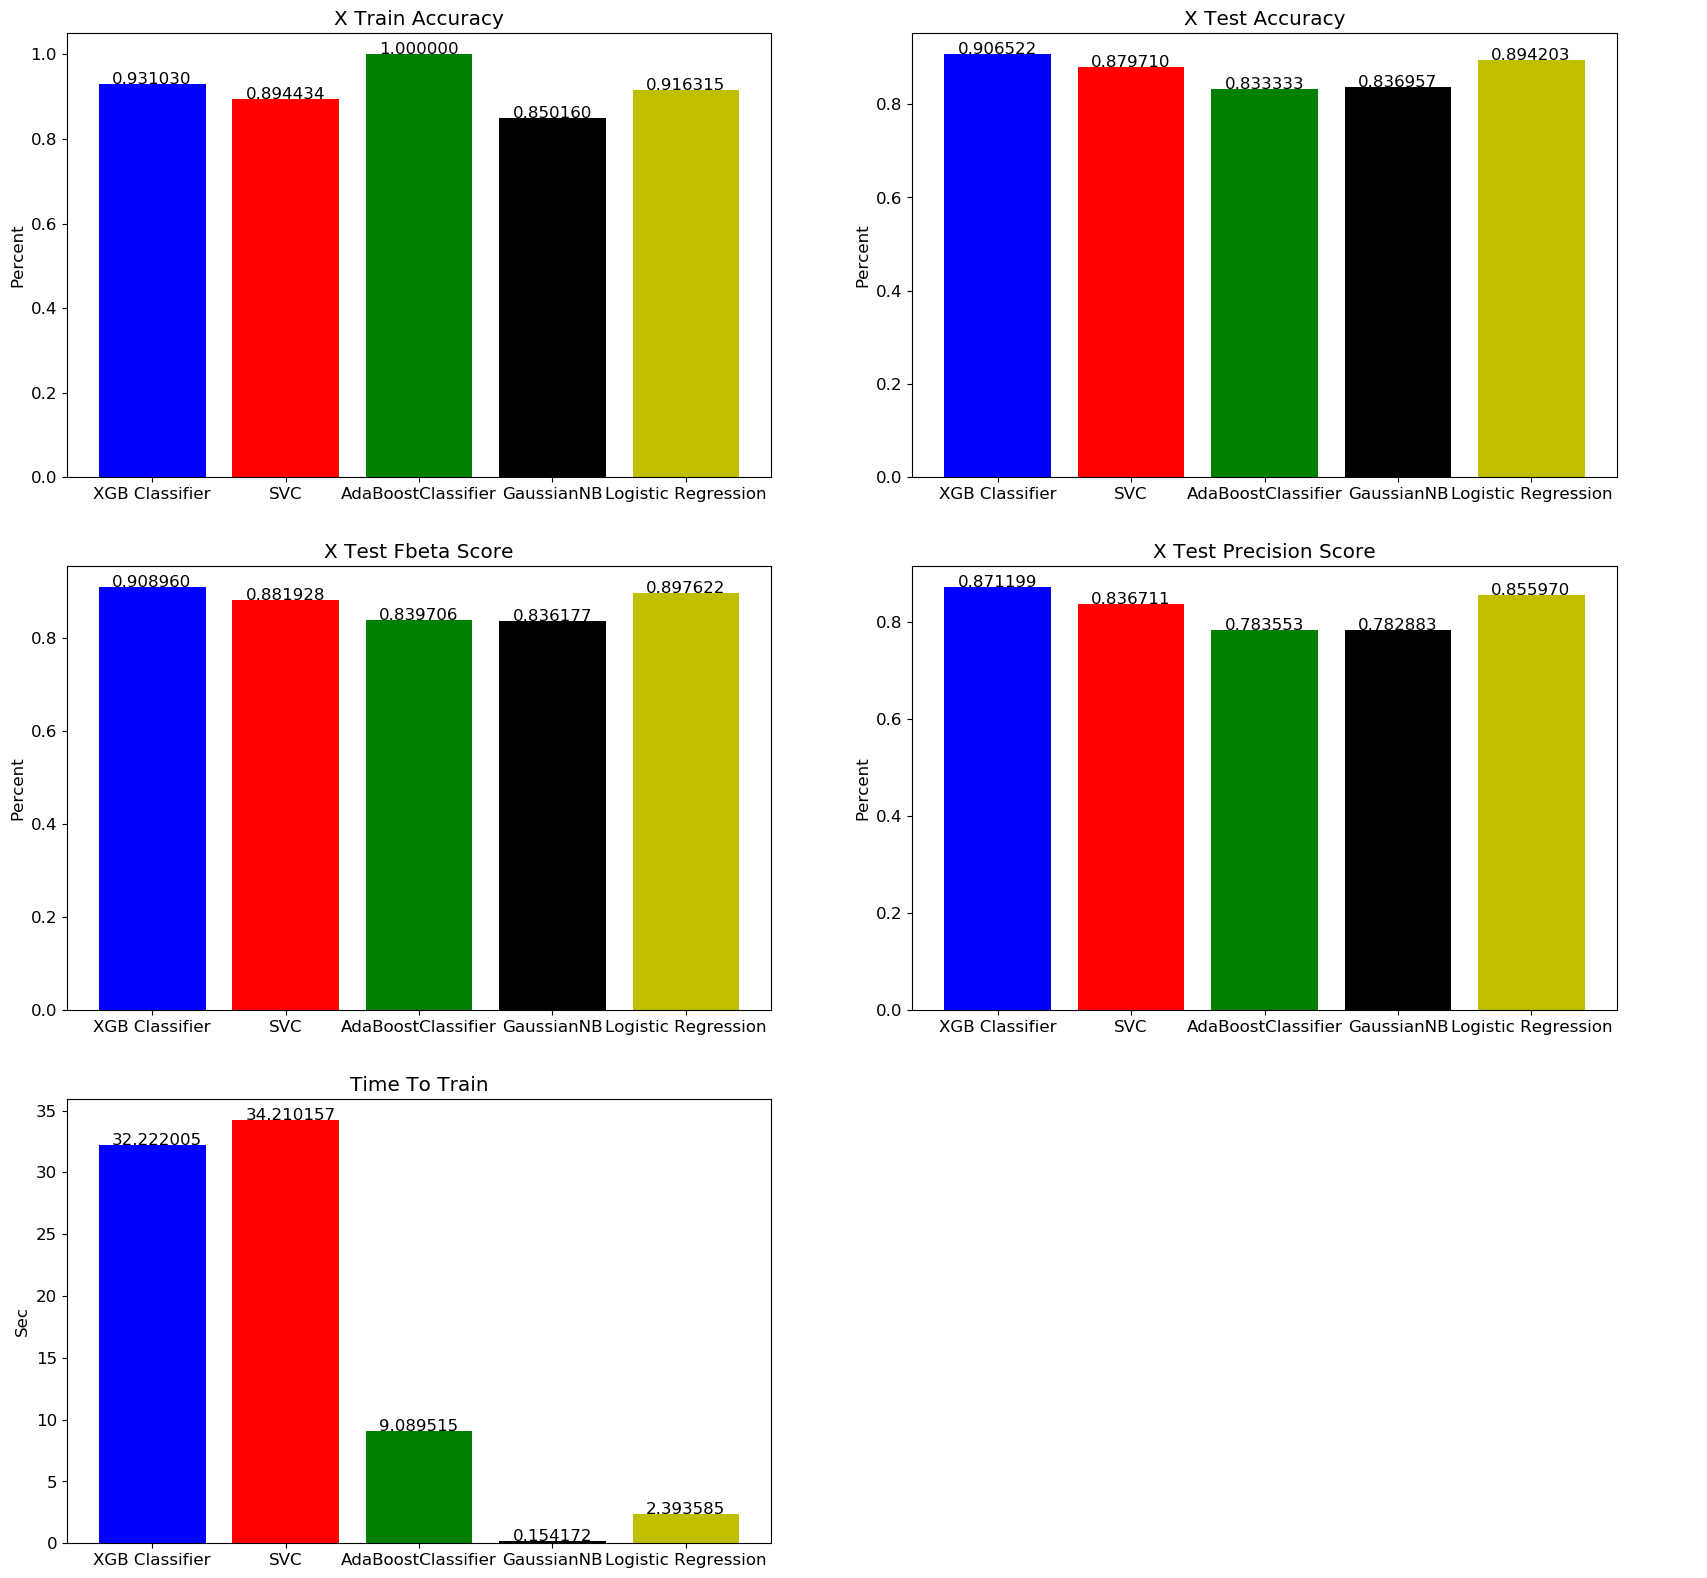

In [9]:
data = model.model_selection(X, y)
v.model_selection_scores(data, mpl, plt)

Loading match data to train on


100%|█████████████████████████████████████████████████████| 18/18 [00:00<00:00, 21.70it/s]


Training set has 1396 samples and 748 features.

Loading future data to predict on


100%|█████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.20it/s]


0.8996452103395844
0.9076464746772591
0.8694171851934149

0.6756208819057273
0.6643732530638572
0.6029434003259192


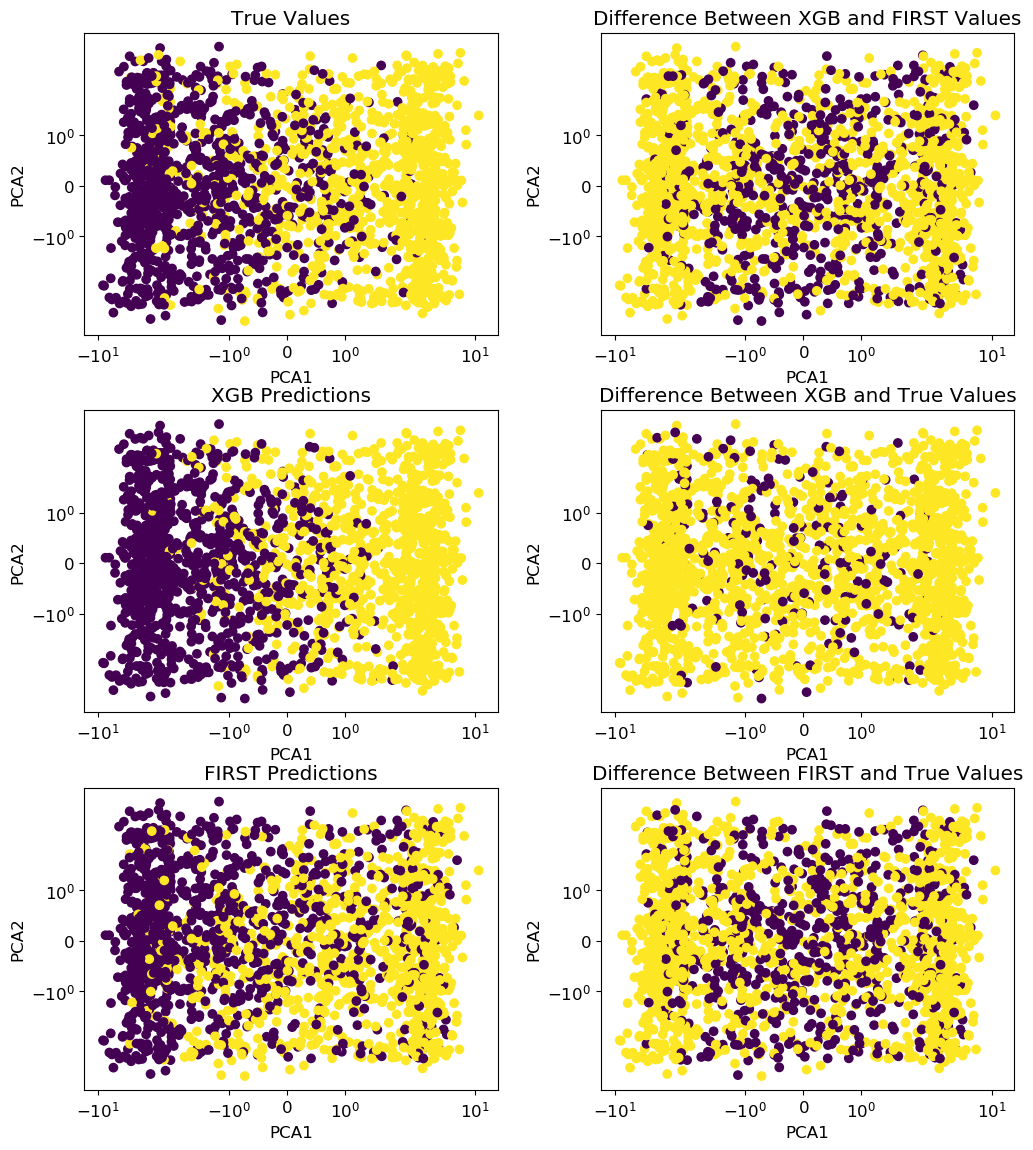

In [10]:
data = model.future_matches_XGB(2)
v.XGB_predictions(data, mpl, plt)

In [11]:
from pandas import DataFrame
features = DataFrame(data[8].feature_importances_.reshape(-1,1,).T, columns=X.columns.values)
features.transpose().nlargest(15, 0)

0
tba_rpEarned_OPR             0.130906
tba_rpEarned_DPR             0.046814
teleopDefensesBreached_OPR   0.042913
Auto_Reached_stdev           0.024274
teleopDefensesBreached_CPR   0.024274
tba_rpEarned_DAVE            0.019939
position3_A_Portcullis_CPR   0.017772
position3_C_Drawbridge_CPR   0.016472
position4_B_Ramparts_OPR     0.016472
teleopDefensesBreached_OAVE  0.016038
position3crossings_CPR       0.014304
Goals_a                      0.013437
towerEndStrength_DAVE        0.013437
position4_C_Drawbridge_DAVE  0.012570
teleopBouldersLow_CPR        0.011704

Loading match data to train on


100%|█████████████████████████████████████████████████████| 18/18 [00:00<00:00, 21.96it/s]


Training set has 1396 samples and 736 features.

Loading future data to predict on


100%|█████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.17it/s]


0.8190572731880386
0.8394313192556973
0.7820498196714906

0.6756208819057273
0.6643732530638572
0.6029434003259192


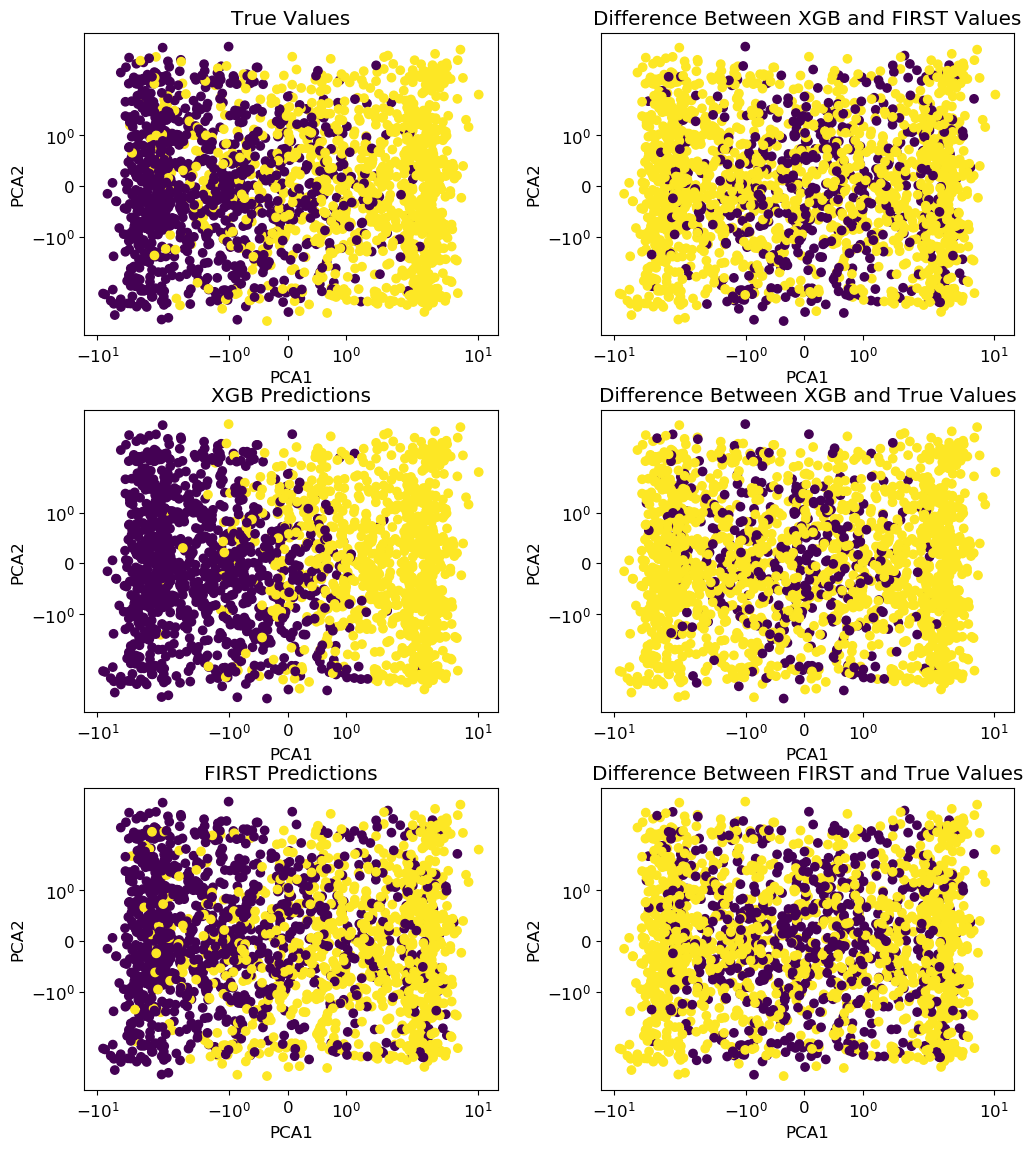

In [12]:
data = model.future_matches_XGB(2, False)
v.XGB_predictions(data, mpl, plt)

In [15]:
X_tmp = X.drop(['Ranking_Score_a', 'tba_rpEarned_OAVE', 'tba_rpEarned_CPR', 'tba_rpEarned_OPR', 'tba_rpEarned_DAVE', 'tba_rpEarned_DPR',
                'Ranking_Score_a_from_mean', 'tba_rpEarned_OAVE_from_mean', 'tba_rpEarned_CPR_from_mean', 'tba_rpEarned_OPR_from_mean', 'tba_rpEarned_DAVE_from_mean', 'tba_rpEarned_DPR_from_mean'], axis=1)
features = DataFrame(data[8].feature_importances_.reshape(-1,1,).T, columns=X_tmp.columns.values)
features.transpose().nlargest(15, 0)

0
CCWM                           0.134411
OPR                            0.059124
Auto_Crossed_a                 0.023820
towerEndStrength_DPR           0.023820
Auto_Reached_a                 0.022118
towerFaceB_Challenged_DAVE     0.022118
Scale/Challenge_a              0.020417
teleopTowerCaptured_DPR        0.017439
Auto_None_a                    0.015313
position1crossings_CPR         0.014462
position5_C_Drawbridge_OPR     0.014037
position3_D_RoughTerrain_OAVE  0.013611
position2_A_Portcullis_DPR     0.012761
position2crossings_CPR         0.011910
position4_A_Portcullis_CPR     0.011910